In [1]:
import csv
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
sns.set_style("whitegrid")

In [3]:
data = pd.read_csv("Final Project Data.csv")

In [4]:
# drop columns that are not needed 
data = data.drop(columns=['Email Address', 'Species'])

In [5]:
data[['Date', 'Time']] = data['Timestamp'].str.split(' ', expand=True)

In [6]:
data.head()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
0,5/31/2025 14:28:49,reptile 1,3,Not moving (snake),"Observing animal behavior, Looking for animal ...",Family w/o kids,00:28,Neutral,NaN,5/31/2025,14:28:49
1,5/31/2025 14:29:17,reptile 1,3,Not moving (snake),"Observing animal behavior, Looking for animal ...",Friends,42,Excitment,NaN,5/31/2025,14:29:17
2,5/31/2025 14:29:51,reptile 1,2,Not moving (snake),"Observing animal behavior, Looking for animal ...",Family w/ kids,00:23,Excitment,NaN,5/31/2025,14:29:51
3,5/31/2025 14:31:13,reptile 1,2,Not moving (snake),"Observing animal behavior, Looking for animal ...",Friends,01:18,Neutral,NaN,5/31/2025,14:31:13
4,5/31/2025 14:31:50,reptile 1,2,Not moving (snake),"Observing animal behavior, Looking for animal ...",Couple,00:33,Neutral,NaN,5/31/2025,14:31:50


In [7]:
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

In [12]:
data.describe()

,Timestamp,Animal,# of people interacting,Animal Position,Guest Interaction,Guest Demographics,Interaction Length,Assumed Emotion,Additional notes,Date,Time
count,154,154,154,153,154,154,154,154,17,154,154
unique,154,9,5,26,23,5,69,3,17,3,154
top,5/31/2025 14:28:49,reptile 2,2,"Sleeping (reptile, monkey, bear)","Observing animal behavior, Pointing at animal",Family w/ kids,00:15,Neutral,Other person in couple even looking often seem...,5/31/2025,14:28:49
freq,1,30,79,42,41,58,7,124,1,67,1


/var/folders/15/tbb712t548vcwk6rxth7tk0h0000gn/T/ipykernel_56349/1653743573.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data, x="Animal",


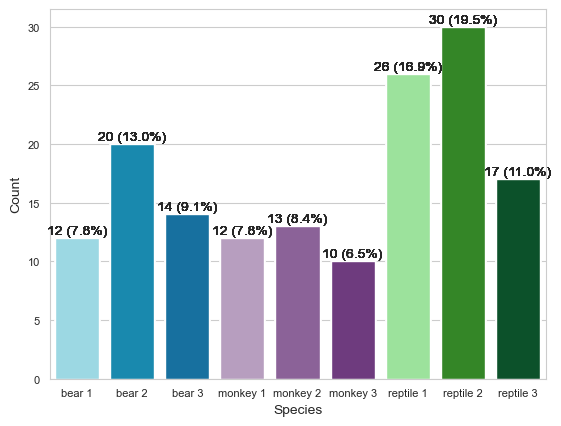

In [11]:
custom_palette = {"bear 1": "#90E0EF", "bear 2": "#0096C7", "bear 3": "#0077B6", 
                  "reptile 1": "#90EE90", "reptile 2": "#299617", "reptile 3": "#005C29", 
                  "monkey 1": "#BA98C4", "monkey 2": "#9059A1", "monkey 3": "#743089"}
ax = sns.countplot(data, x="Animal", 
                   order=data['Animal'].sort_values(),
                   palette=custom_palette)

plt.xlabel("Species")
plt.ylabel("Count")

plt.tick_params(labelsize=8)

# Add percentages and counts to the bars
total = len(data)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.annotate(f'{math.floor(height)} ({percentage:.1f}%)', (p.get_x() + p.get_width() / 2, height), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()